<a href="https://colab.research.google.com/github/gabrielsuper/projetosdata/blob/main/Predi%C3%A7%C3%A3o%20de%20pre%C3%A7os%20de%20carros%20usados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Projeto I - Aplicação de Métodos de Aprendizagem de Máquina

### **Identificação**
Gabriel da Cruz Oliveira (2992461)

Heliton Ribeiro Ferreira (2735733)

Roberto Batista (3026211)

William Francisco Rocha Ribeiro (2790515)

#Avaliação 1 - Introdução e Fundamentação Teórica (Primeira parte): Descrição do Problema

##Previsão de preço de carro com Machine Learning

Avaliar o valor atual de um carro depende de vários fatores, alguns deles como a marca e o modelo do carro, as suas características de fábrica, a potência, a quilometragem que já foi usada, segurança, entre alguns outros fatores.

De acordo com a [Web Motors](https://www.webmotors.com.br/wm1/dinheiro-e-economia/quanto-vale-meu-carro-5-passos-para-descobrir), ela lista 5 passos para descobrir como avaliar melhor o seu automóvel, entre eles um que destaca a atenção é refrente ao valor da tabela FIPE. 

A Tabela FIPE foi criada pela Fundação Instituto de Pesquisas Econômicas, segundo o site [Quatro Rodas](https://quatrorodas.abril.com.br/tabela-fipe/)
"O índice é baseado na coleta de preços de carros, motos e caminhões usados, seminovos e novos no mercado nacional. Em posse dos valores, pesquisadores descartam os preços muito altos, baixos ou com alguma discrepância estatística. Os números restantes são usados para criar uma média, e é esse o valor que vai constar para aquele determinado veículo na tabela."

Nesse caso usaremos o valor de preço de carros já vendidos para predizer a venda de novos carros que tenham características parecidas.


> **Objetivo**

Esse projeto tem como objetivo aplicar algoritmos de machine learning na predição de preços de carros usados.

> **Especificação Técnica**

Dataset: Para desenvolvimento desse projeto, será utilizado o dataset encontrado no Kaggle
chamado Vehicle dataset que contém dados de carros usados  disponível em:<  https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho?select=car+data.csv >

Formato: A base de dados está em formato CSV com colunas contendo dados em object e outras em int, divida em 9 colunas em ordem conforme descrito abaixo:

1. Car_name -> Nome do carro
2. Year -> Ano em que o carro foi comprado
3. selling_price -> Preço que o proprietário do carro deseja vender
4. Present_Price -> Preço atual vendido pela loja
5. Kms_driven -> Distância pecorrida pelo carro em KM
6. Fuel_Type -> Tipo de combustível do carro
7. Seller_Type -> Define se o vendedor é loja ou pessoa física
8. Transmission -> Define se o carro é manual ou automático
9. Owner -> Número de proprietários que o carro já teve

Métodos de Pŕe-processamento: O dataset escolhido parece ser um dataset pequeno. Sendo assim, na etapa de pré-processsamento vamos verificar a possibilidade dos seguintes passos:

*  Verificação, remoção ou inclusão de dados faltantes
*  Remoção de colunas irrelevantes
*  Codificar os dados categóricos
*  Renomear colunas

Tarefa de Aprendizado: Será aplicado a tarefa de Regessão e Arvore de decisão.

Algoritmos Avaliados: Para prever os preços dos carros usados iremos utilizar o modelo LinearRegression, LassoRegression e  RandomForest.

Métricas de Avaliação: R-squared.

#Avaliação 2 - Metodologia, Resultados e Discussão (Segunda parte): Preparação dos Dados

###Importando os dados


In [ ]:
#Importando a biblioteca pandas para importação e tratativa dos dados
import pandas as pd

In [ ]:
#Importando o dataset
url = 'https://raw.githubusercontent.com/gabrielsuper/projetosdata/main/pasta/car%20data.csv'
df = pd.read_csv(url)

#Verificando tamanho do dataset em linhas e colunas

print('O dataset contém {} linhas e {} colunas.'.format(df.shape[0],df.shape[1]))

O dataset contém 301 linhas e 9 colunas.


In [ ]:
#Visualizando as 5 primeiras linhas do dataset

df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
#Visualizando as 5 ultimas linhas do dataset

df.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


As colunas estão com os nomes em inglês, para facilitar o uso do dataset será feito a tradução para português.


In [ ]:
#Renomeando as colunas

df.columns = ['Carro','Ano','Preco_Venda','Preco_Atual','Distancia_KM','Tipo_Combustivel','Vendedor','Transmissao','Qtd_Proprietario']
df.head()

,Carro,Ano,Preco_Venda,Preco_Atual,Distancia_KM,Tipo_Combustivel,Vendedor,Transmissao,Qtd_Proprietario
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


##Identificando as váriaveis

In [ ]:
#Utilizar a função df.info() para ter informações sobre as variáveis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Carro             301 non-null    object 
 1   Ano               301 non-null    int64  
 2   Preco_Venda       301 non-null    float64
 3   Preco_Atual       301 non-null    float64
 4   Distancia_KM      301 non-null    int64  
 5   Tipo_Combustivel  301 non-null    object 
 6   Vendedor          301 non-null    object 
 7   Transmissao       301 non-null    object 
 8   Qtd_Proprietario  301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


Usando o comando df.info() tivemos como resposta as 9 variáveis(colunas) e 301 entradas. Essas variáveis são dividas em categóricas e númericas.

Variáveis categóricas: Carro,tipo de combustível, vendedor, transmissão.
Variáveis númericas: Ano, preço de venda, preço atual, distancia em km,quantidade de proprietários.

O dataset não possui dados nulos em qualquer váriavel,não precisando realizarmos tratativas de inclusão ou remoção para dados faltantes.

A variável ano está como númerica, entretanto não utilizaremos ela para operações matemáticas.



In [ ]:
#Usando o comando isnull para confirmar se existe dados faltantes

df.isnull().sum()

Carro               0
Ano                 0
Preco_Venda         0
Preco_Atual         0
Distancia_KM        0
Tipo_Combustivel    0
Vendedor            0
Transmissao         0
Qtd_Proprietario    0
dtype: int64

In [ ]:
#Verificando a distribuição dos dados categoricos

print(df.Tipo_Combustivel.value_counts(),'\n')
print(df.Vendedor.value_counts(),'\n')
print(df.Transmissao.value_counts(),'\n')

Petrol    239
Diesel     60
CNG         2
Name: Tipo_Combustivel, dtype: int64 

Dealer        195
Individual    106
Name: Vendedor, dtype: int64 

Manual       261
Automatic     40
Name: Transmissao, dtype: int64 



##Análise Exploratória dos Dados e Pré-Processamento dos dados

Iremos identificar algumas distribuição no dataset como um todo, para isso vamos utilizar a função *describe* que plota uma tabela com dados estatísticos do nosso dataset.

In [ ]:
#Obtendo informações das variáveis
df.describe()

,Ano,Preco_Venda,Preco_Atual,Distancia_KM,Qtd_Proprietario
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


- Analisando as variáveis podemos concluir que nosso dataset tem dados de anos iniciando em 2003 até 2018.
- O máximo que um carro usado teve de proprietário foram três.
- Foi possível observar os valores entre preço de venda e o preço atual dos carros.

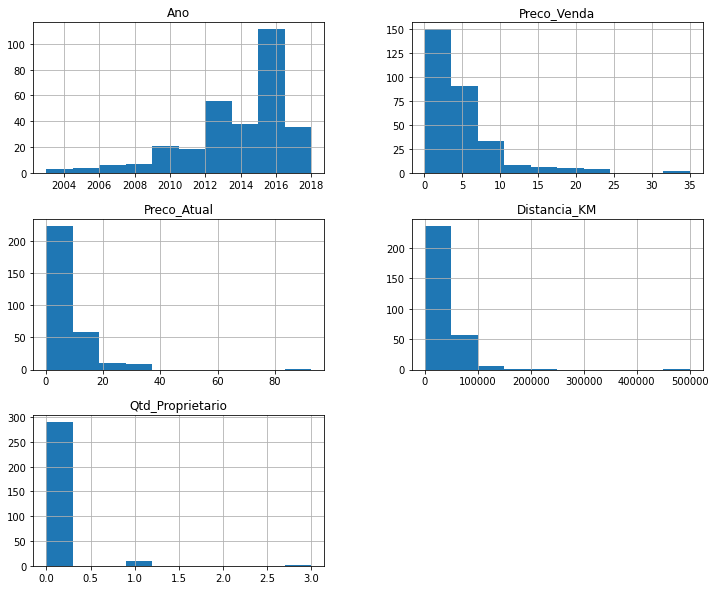

In [ ]:
#Plotar um histograma para cada variável para ter uma visão geral como estão distribuidas

df.hist(figsize=(12,10));

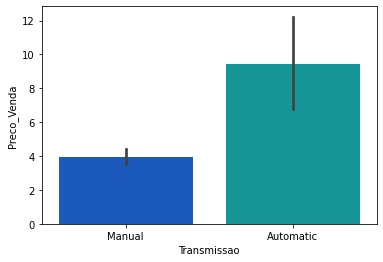

In [ ]:
# Importando o seaborn e matplotlib para explorar algumas variáveis
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='Transmissao',y='Preco_Venda',data=df,palette='winter')

Podemos ver que os veículos automáticos apresentam um grande valor de revenda no mercado em comparação com a transmissão manual.

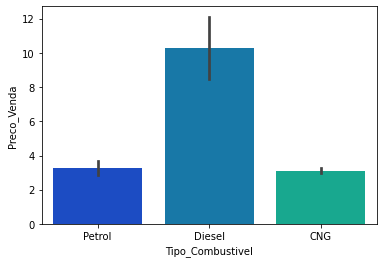

In [ ]:
#Analisando a variavel combustivel pelo preço de venda
sns.barplot(x='Tipo_Combustivel',y='Preco_Venda',data=df,palette='winter')

Veículos com motor a diesel tem o maior preço de venda entre os veículos  a gasolina e CNG


In [ ]:
#Deletando a coluna carro para uma melhor correlação entre as colunas

df = df.drop(['Carro'],axis=1)


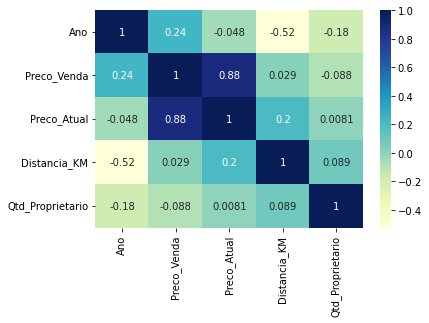

In [ ]:
#Correlacionado as variáveis para verificar o grau de dependência

correlacao = df.corr()
sns.heatmap(correlacao,cmap='YlGnBu',annot=True)

Agora vamos realizar a transformação dos dados categóricos em números para podermos utilizar no nosso modelo de machine learning

In [ ]:
#Transformação da coluna tipo de combustivel

df.replace({'Tipo_Combustivel':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

#Transformação da coluna vendedor

df.replace({'Vendedor':{'Dealer':0,'Individual':1}},inplace=True)

#Transformação da transmissao

df.replace({'Transmissao':{'Manual':0,'Automatic':1}},inplace=True)

df.head()

,Ano,Preco_Venda,Preco_Atual,Distancia_KM,Tipo_Combustivel,Vendedor,Transmissao,Qtd_Proprietario
0,2014,3.35,5.59,27000,0,0,0,0
1,2013,4.75,9.54,43000,1,0,0,0
2,2017,7.25,9.85,6900,0,0,0,0
3,2011,2.85,4.15,5200,0,0,0,0
4,2014,4.60,6.87,42450,1,0,0,0


Agora que temos nosso dataset analisando e feito as transformações necessárias para nosso modelo de machine learning, vamos dividi-lo entre treino e teste utilizando a biblioteca scikit-learn.

##Particionando os Dados em Treino/Teste

In [ ]:
# Separando os dados em teste e treino 

from sklearn.model_selection import train_test_split

x=df.drop(['Preco_Venda'],axis=1)
y=df['Preco_Venda']

x_treino, x_teste, y_treino,y_teste  = train_test_split(x, y, test_size = 0.25,random_state = 1)

###Modelo XGBoost

O XGBoost é um algoritmo de aprendizado de máquina, baseado em árvore de decisão e que utiliza uma estrutura de Gradient boosting.

Em problemas de previsão envolvendo dados não estruturados, como imagens, textos e vídeos, as redes neurais artificiais tendem a superar todos os outros algoritmos ou frameworks.

No entanto, quando se trata de dados estruturados/tabulares, algoritmos baseados em árvore de decisão são considerados os melhores da sua classe no momento.

O algoritmo xgboost possui parâmetros para classificação e regressão, para a nossa previsão de vendas utilizaremos o modelo **XGBRegressor**.


In [ ]:
#Utilizando o algoritmo XGBoost

from xgboost.sklearn import XGBRegressor
xgb = XGBRegressor();
xgb.fit(x_treino,y_treino);

[21:34:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
#Avaliando o modelo xgboost
from sklearn.metrics import r2_score

y_pred_xgb = xgb.predict(x_teste)

xgb_pred_dataset = pd.DataFrame({"Dados Atuais": y_teste, "Predição": y_pred_xgb,"Variação %":((y_teste/y_pred_xgb)-1)*100})
print(xgb_pred_dataset)
print('Utilizando o R2_Score como métrica de avaliação foi possível obter cerca {0:.2f}% de predição dos dados.'.format(r2_score(y_teste, y_pred_xgb)*100))

     Dados Atuais  Predição  Variação %
285          7.40  7.319337    1.102055
248          4.00  2.898783   37.988955
150          0.50  0.562585  -11.124484
217          3.15  3.361792   -6.299976
107          1.25  1.155555    8.173083
..            ...       ...         ...
17           7.75  8.039877   -3.605490
95           5.85  5.409232    8.148437
169          0.40  0.450739  -11.256782
112          1.15  1.338742  -14.098445
42           1.95  2.575568  -24.288551

[76 rows x 3 columns]
Utilizando o R2_Score como métrica de avaliação foi possível obter cerca 94.51% de predição dos dados.


Iremos avaliar outros algoritmo de machine learning para verificar se ocorre o aumento do percentual na predição dos dados.

#Avaliação 3 - Avaliação do Projeto de Ensino (Terceira Parte): Avaliação dos métodos e predição.

##Modelo Random Forest

De acordo com a [Didatica.Tech](https://didatica.tech/o-que-e-e-como-funciona-o-algoritmo-randomforest/) as Árvores de Decisão, ou Decision Trees, estabelecem regras para tomada de decisão. O algoritmo criará uma estrutura similar a um fluxograma, com “nós” onde uma condição é verificada, e se atendida o fluxo segue por um ramo, caso contrário, por outro, sempre levando ao próximo nó, até a finalização da árvore.

Vamos utilizar o modelo random forest que tem como base o metódo ensemble que também é utilizado por outros modelos, nele a característica principal é a combinação de diferentes modelos para se obter um único resultado.




In [ ]:
#Utilizando o algoritmo RandomForestRegressor

from sklearn.ensemble import RandomForestRegressor
modelo_arvoredecisao = RandomForestRegressor()
modelo_arvoredecisao.fit(x_treino, y_treino)


RandomForestRegressor()

In [ ]:
#Avaliando o modelo RandomForestRegressor
y_pred_rfr = modelo_arvoredecisao.predict(x_teste)

rfr_pred_dataset = pd.DataFrame({"Dados Atuais": y_teste, "Predição": y_pred_rfr,"Variação %":((y_teste/y_pred_rfr)-1)*100})
print(rfr_pred_dataset)
print('Utilizando o R2_Score como métrica de avaliação foi possível obter cerca {0:.2f}% de predição dos dados.'.format(r2_score(y_teste, y_pred_rfr)*100))

     Dados Atuais  Predição  Variação %
285          7.40    6.5690   12.650327
248          4.00    2.8865   38.576130
150          0.50    0.4749    5.285323
217          3.15    2.9530    6.671182
107          1.25    1.0566   18.303994
..            ...       ...         ...
17           7.75    7.7915   -0.532632
95           5.85    5.9675   -1.968999
169          0.40    0.4179   -4.283321
112          1.15    1.1737   -2.019255
42           1.95    2.3770  -17.963820

[76 rows x 3 columns]
Utilizando o R2_Score como métrica de avaliação foi possível obter cerca 90.96% de predição dos dados.


Utilizando o metodo de aprendizado Random Forest regressor obtemos cerca de 89.29% de predição, um número auto, entretanto é possível perceber que tem uma variação alta entre os dados reais e os dados de predição.
Vamos prosseguir com mais modelos para termos uma conclusão do melhor metódo de aprendizado.


## Regressão Linear

Segundo [IBM](https://www.ibm.com/br-pt/analytics/learn/linear-regression) a análise de regressão linear é usada para prever o valor de uma variável com base no valor de outra. A variável que deseja prever é chamada de variável dependente. A variável que é usada para prever o valor de outra variável é chamada de variável independente.

Seguindo com essa breve explicação vamos aplicar o modelo de regressão linear para avaliarmos seu nível de predição.


In [ ]:
#Utilizando o algoritmo LinearRegression

from sklearn.linear_model import LinearRegression
modelo_LinearRegression = LinearRegression()
modelo_LinearRegression.fit(x_treino, y_treino)

LinearRegression()

In [ ]:
#Avaliando o modelo LinearRegression
y_pred_lir = modelo_LinearRegression.predict(x_teste)

lir_pred_dataset = pd.DataFrame({"Dados Atuais": y_teste, "Predição": y_pred_lir,"Variação %":((y_teste/y_pred_lir)-1)*100})
print(lir_pred_dataset)
print('Utilizando o R2_Score como métrica de avaliação foi possível obter cerca {0:.2f}% de predição dos dados.'.format(r2_score(y_teste, y_pred_lir)*100))

     Dados Atuais  Predição  Variação %
285          7.40  7.886136   -6.164433
248          4.00  2.967113   34.811157
150          0.50 -0.678769 -173.662780
217          3.15  4.243375  -25.766628
107          1.25  0.450168  177.674043
..            ...       ...         ...
17           7.75  8.401469   -7.754231
95           5.85  8.632634  -32.233892
169          0.40  0.887807  -54.945164
112          1.15  1.314669  -12.525486
42           1.95  1.841138    5.912749

[76 rows x 3 columns]
Utilizando o R2_Score como métrica de avaliação foi possível obter cerca 83.88% de predição dos dados.


Utilizando o metodo de aprendizado Linear Regression obtemos cerca de 83.88% de predição, um percentual menor comparado aos outros modelos já utilizados, entretanto é possível perceber que também possui uma variação alta entre os dados reais e os dados de predição.
Vamos prosseguir com o último modelo para termos uma conclusão do melhor metódo de aprendizado.


## Lasso Regressão

A Regressão de Lasso é uma variação da regressão linear onde seu principal intuito é ajudar a diminuir a limitação do modelo. Os valores dos dados encolhem para o centro ou média para evitar o sobreajustamento dos dados. 
Utilizando a referência do [Data Science Team](https://datascience.eu/pt/aprendizado-de-maquina/regressao-lasso-definicao-simples/) podemos compreender que a Regressão Lasso pode eliminar as variáveis inúteis da equação. Este tipo de regressão é melhor do que a regressão de Ridge e ajuda a reduzir as variâncias num modelo de aprendizagem da máquina que contém muitas variâncias.

Seguindo com essa breve explicação vamos aplicar o modelo de regressão de lasso para avaliarmos seu nível de predição.


In [ ]:
#Utilizando o algoritmo lasso

from sklearn.linear_model import Lasso
modelo_Lasso = Lasso()
modelo_Lasso.fit(x_treino, y_treino)

Lasso()

In [ ]:
#Avaliando o modelo Lasso
y_pred_las = modelo_Lasso.predict(x_teste)

las_pred_dataset = pd.DataFrame({"Dados Atuais": y_teste, "Predição": y_pred_las,"Variação %":((y_teste/y_pred_las)-1)*100})
print(las_pred_dataset)
print('Utilizando o R2_Score como métrica de avaliação foi possível obter cerca {0:.2f}% de predição dos dados.'.format(r2_score(y_teste, y_pred_las)*100))

     Dados Atuais  Predição  Variação %
285          7.40  6.021796   22.886923
248          4.00  2.976606   34.381252
150          0.50  0.499767    0.046633
217          3.15  3.928292  -19.812471
107          1.25  1.451289  -13.869648
..            ...       ...         ...
17           7.75  7.070497    9.610403
95           5.85  9.666238  -39.480075
169          0.40  1.608514  -75.132327
112          1.15  2.274557  -49.440702
42           1.95  2.542640  -23.308052

[76 rows x 3 columns]
Utilizando o R2_Score como métrica de avaliação foi possível obter cerca 82.66% de predição dos dados.


Utilizando o metodo de aprendizado Lasso Regression obtemos cerca de 82.66% de predição, um percentual menor comparado aos outros modelos já utilizados, entretanto é possível perceber que também possui uma variação alta entre os dados reais e os dados de predição.

Vamos plotar um gráfico comparando todos os dados de predição com os dados atuais para termos uma opção visual para análise.


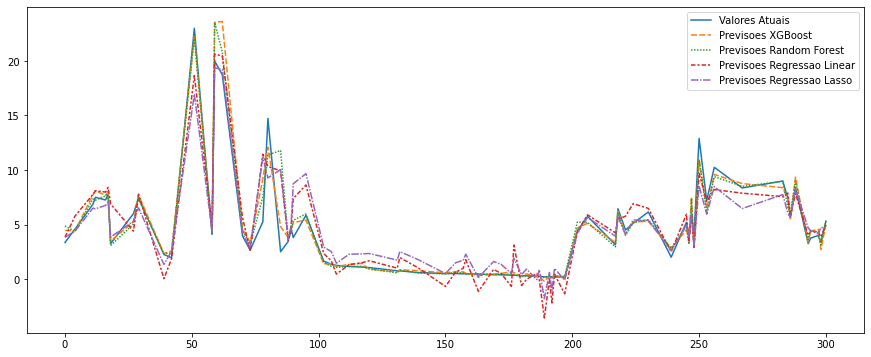

In [ ]:
#Gráfico de linhas para análise das prediçãos

tabela_auxiliar = pd.DataFrame()
tabela_auxiliar["Valores Atuais"] = y_teste
tabela_auxiliar["Previsoes XGBoost"] = y_pred_xgb
tabela_auxiliar["Previsoes Random Forest"] = y_pred_rfr
tabela_auxiliar["Previsoes Regressao Linear"] = y_pred_lir
tabela_auxiliar["Previsoes Regressao Lasso"] = y_pred_las

plt.figure(figsize=(15,6))
sns.lineplot(data=tabela_auxiliar)
plt.show()

#Conclusão

O modelo XGBRegressor e Random Forest se mostraram eficientes para prever o preço dos carros usados.

Utilizando a métrica R2 Score podemos chegar nessas seguintes conclusões, o XGBoost alcançamos um percentual de predição de 94.51%, o random forest de 89.29%, a regressão linear de 83.88% e a regresão lasso de 82.66%.

Podemos escolher o XGBoost como o melhor modelo e a regressão lasso como a pior. Pois o XGBoost foi o modelo que conseguiu prever melhor o preço dos carros usados.

